<a href="https://colab.research.google.com/github/Luigi-Pontello/data_analyst_luigipontello/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

Apesar de possuir uma das maiores belezas naturais do nosso país, e representar um ponto histórico de importância grandiosa, o Rio de Janeiro nos últimos anos vem se destacando de uma outra forma, mais negativa, para o Brasil e para o mundo.

Segundo o estudo realizado pela plataforma [Fogo Cruzado](https://fogocruzado.org.br/), os casos de violência com três ou mais mortes no Rio aumentaram cerca de 83%.

Noticias como estas vem fazendo a Cidade Maravilhosa afastar cada vez mais deste seu título. Baseado nestas informações, iremos analisar os dados da violência no Rio de Janeiro e buscar entender e conhecer seus detalhes. 


## Obtenção dos Dados

Os dados utilizados neste dataset foram obtidos através do portal [ISPDados](http://www.ispdados.rj.gov.br/), uma página de Dados Abertos do Instituto de Segurança Pública. Nela, você consegue acessar as bases de dados de registros criminais e de atividade policial do estado do Rio de Janeiro. As estatísticas  divulgadas no portal são moldadas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). 

Toda essa criação e consolidação de informações exigiu um processo de revisão dos dados divulgados, com vistas à equalização de códigos de ocorrência contabilizados e agregados em cada título divulgado ao longo do tempo.

### Importação dos dados

Utilizaremos um dataset que ja está consolidado no github.

In [1]:
#Importaremos o Dataset e a biblioteca a ser utilizada.

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

O processo de analíse inicial de qualquer conjunto de dados envolve primeiro entendermos e conhecermos com um pouco mais de detalhes, com o que estamos litando.

Queremos ver como estão os dados, qual o tamanho real do nosso dataset, os tipos de valores compostos, e dai em diante. 


Primeiramente, vamos visualizar as 5 primeiras linhas do DataFrame

In [2]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Qual o tamanho do DataFrame?

In [3]:
df.shape

(344, 56)

Ou seja, um DataFrame composto por 344 linhas, e 56 variáveis.

Observaremos agora o nome das 56 colunas das variáveis e o tipo delas.

In [8]:
# Conferindo o nome das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [9]:
# Checando os types das colunas
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Por fim, qual a porcentagem de valores ausentes nos temos neste Dataset?

In [21]:
round((df.isnull().sum() / df.shape[0]) * 100)


vano                           0.0
mes                            0.0
hom_doloso                     0.0
lesao_corp_morte              28.0
latrocinio                     0.0
hom_por_interv_policial       24.0
tentat_hom                     0.0
lesao_corp_dolosa              0.0
estupro                       42.0
hom_culposo                   24.0
lesao_corp_culposa            28.0
roubo_comercio                 0.0
roubo_residencia               0.0
roubo_veiculo                  0.0
roubo_carga                    0.0
roubo_transeunte               0.0
roubo_em_coletivo              0.0
roubo_banco                    0.0
roubo_cx_eletronico           42.0
roubo_celular                 31.0
roubo_conducao_saque          42.0
roubo_apos_saque              42.0
roubo_bicicleta               80.0
outros_roubos                  0.0
total_roubos                   0.0
furto_veiculos                 0.0
furto_transeunte               0.0
furto_coletivo                42.0
furto_celular       

## Informações Estatísticas da Violência no Rio de Janeiro

Não basta apenas visualizarmos os números presentes, é essencial entendermos um pouco do que esses números representam, neste momento a estatística, principalmente a descritiva, é a nossa aliada. 

Entender e conhecer os detalhes estatísticos podem nos auxiliar a encontrar padrões, explicar frequências, e até mesmo razões de alguns eventos. 



  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$


Sendo assim, vamos checar as estatísticas gerais dos nossos dados.

In [22]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Importante entendermos como se comporta alguns dados do Rio de Janeiro. Sendo assim, vamos visualizar as médias mensais de roubo a veículo, furto a veículo e recuperação de veículos, por ano, desde 1991.

In [29]:
#Média mensal de roubo de veículos, por ano, com o auxilio da tabela dinâmica.
round(df.pivot_table('roubo_veiculo', index=['vano'], aggfunc='mean'))


,roubo_veiculo
vano,
1991,1371.0
1992,2042.0
1993,2066.0
1994,2289.0
1995,1973.0
1996,1531.0
1997,1631.0
1998,1793.0
1999,2472.0


In [31]:
#Média de furto de veículos por ano, com o auxilio da tabela dinâmica.

round(df.pivot_table('furto_veiculos', index=['vano'], aggfunc='mean'))


,furto_veiculos
vano,
1991,1998.0
1992,2302.0
1993,2241.0
1994,2186.0
1995,1827.0
1996,1677.0
1997,1820.0
1998,1776.0
1999,1710.0


In [34]:
#Média de recuperacao_veiculos por ano, com o auxilio da tabela dinâmica.

round(df.pivot_table('recuperacao_veiculos', index=['vano'], aggfunc='mean'))


,recuperacao_veiculos
vano,
1991,824.0
1992,937.0
1993,968.0
1994,1336.0
1995,1468.0
1996,929.0
1997,886.0
1998,1013.0
1999,1318.0



Agora, vamos checar qual a porcentagem de recuperação de veícuslos, ou seja, dos veículos que são furtados ou roubados, quantos são em média recuperados.

  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$



In [36]:
df_fv = (df.roubo_veiculo.mean() + df.furto_veiculos.mean()) 
df_rec = df.recuperacao_veiculos.mean() / df_fv
round(df_rec*100)

43

A cada 100 veículos furtados ou roubados, 43 são recuperados.

Agora iremos ver qual foi a maior quantidade de homícios por mês e a menor, desde 1991. 
E concluímos que o triste recorde de mortes é de 831 homícidios em um mês, e a mínima foi de 272, o que da uma méddia de 9 assassinatos por dia.

In [37]:
df.hom_doloso.max()

831

In [38]:
df.hom_doloso.min()

272

## Visualização de Dados

A visualização de dados é uma importante etapa do processo de análise dos dados, pois nela comunicamos visualmente informações com nosso leitor ou com quem queremos comunicar diretamente.
É uma grande ferramenta de auxílio que deve ser explorada com cautela, para que não faça o inverso do desejado, ou seja, que confunda mais que transmita a informação.



Resolvi plotar dois histogramas, um com homícidios dolosos e outro com homícidios culposos para visualizar como estão presentes estas diferenças.

Como as nomenclaturas podem confundir, homício culposo é aquele cujo não existe a intenção de matar, ja o doloso é quando existe essa intenção.

Conforme visualizamos nos histogramas, é nítida a diferença de volume entre as duas formas de homícidio. 

Os homícidios dolosos possuem números bem mais expressivos que os homícidios culposos.

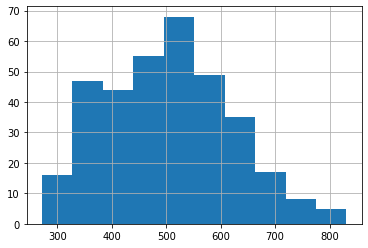

In [45]:
df.hom_doloso.hist()

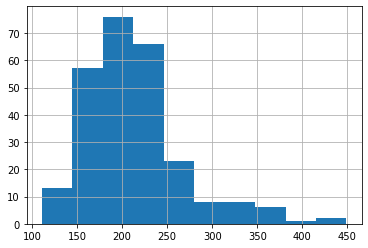

In [46]:
df.hom_culposo.hist()

Uma das informações que são fornecidas pelo Dataset, são os números de roubo a coletivos, ou seja, os roubos em transportes públicos, como ônibus e lotações. 

Buscando entender o quão e se evoluíram ou não estes números, plotei um gráfico de linhas, guiado pelos anos, para tentar entender como se comportam estes dados.

É bem perceptível que nos últimos 4 anos houve um aumento considerável nos roubos a coletivos.

Conseguimos notar visualmente um aumento de praticamente 3 vezes, de 2013 para 2019.

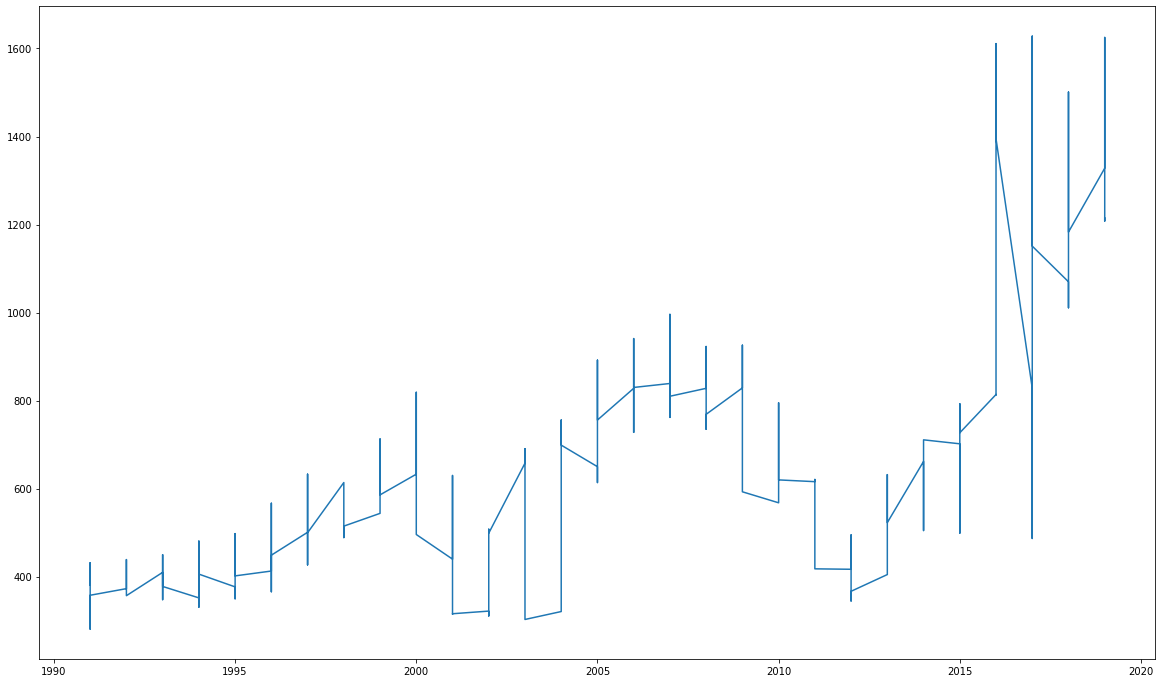

In [53]:
#df.roubo_em_coletivo.plot()
from matplotlib import pyplot as plt

plt.figure(figsize = (20, 12))

plt.plot(df.vano, df.roubo_em_coletivo)
plt.show()

## Conclusão

Logo no início da nossa análise, mencionamos a pesquisa feita pelo [Fogo Cruzado](https://fogocruzado.org.br/), que ja dizia sobre o aumento de mortes violentas no Rio de Janeiro. 
Partindo deste ponto ja conseguíamos ter uma ideia de que a realidade não seria algo tão agradável. A cada checagem de informação conseguíamos ver que de fato, os números de violência no Rio de Janeiro vem aumentando, em todas as direções.

Desta feita fica o alerta e o pedido para que seja feito algo quanto a segurança pública, para que nossa Cidade Maravilhosa não se torne uma Cidade das Trevas pelo descaso com a segurança.